In [21]:
import torch
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import numpy as np
import seaborn as sns
from utils import KS_test, t_test
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from pyhelpers.store import save_fig
from scipy.stats import wasserstein_distance
from torch.utils.data import DataLoader, TensorDataset


In [22]:
class Reshape(nn.Module):
    def __init__(self, sequence_length, hidden_size):
        super().__init__()
        self.sequence_length = sequence_length
        self.hidden_size = hidden_size

    def forward(self, x):
        return x.reshape(x.shape[0], -1)

In [23]:
col_names = ["idx","pressure","sensor_integrated_voltage", "sensor_real_voltage","bending_angle","angle_extra","pressure_extra"]
# df0 = pd.read_csv("piezoelectric_dataset/1.txt", delimiter=",", names=col_names)
df1 = pd.read_csv("piezoelectric_dataset/2.txt", delimiter=",", names=col_names)
# df2 = pd.read_csv("piezoelectric_dataset/3.txt", delimiter=",", names=col_names)
df3 = pd.read_csv("piezoelectric_dataset/4.txt", delimiter=",", names=col_names)
# df4 = pd.read_csv("piezoelectric_dataset/5.txt", delimiter=",", names=col_names)
df5 = pd.read_csv("piezoelectric_dataset/6.txt", delimiter=",", names=col_names)
df6 = pd.read_csv("piezoelectric_dataset/7.txt", delimiter=",", names=col_names)
df7 = pd.read_csv("piezoelectric_dataset/8.txt", delimiter=",", names=col_names)
df8 = pd.read_csv("piezoelectric_dataset/9.txt", delimiter=",", names=col_names)
df9 = pd.read_csv("piezoelectric_dataset/10.txt", delimiter=",", names=col_names)
df10 = pd.read_csv("piezoelectric_dataset/12.txt", delimiter=",", names=col_names)
df11 = pd.read_csv("piezoelectric_dataset/15.txt", delimiter=",", names=col_names)

df1.head()

,idx,pressure,sensor_integrated_voltage,sensor_real_voltage,bending_angle,angle_extra,pressure_extra
0,0.003112,0.00146,0.000002,0.0024,1.995524,0.726853,0.000000
1,0.007195,0.00162,0.000020,0.0040,1.995524,0.726853,0.008696
2,0.040134,-0.00048,0.000027,0.0032,1.652785,0.726853,0.017391
3,0.073087,0.00016,0.000019,0.0016,1.402639,0.726853,0.026087
4,0.105869,0.00210,0.000019,0.0024,2.116679,4.045702,0.034783


In [24]:
# ## Extra left over data analysis
# df_1_org = pd.read_csv("piezoelectric_dataset/1.txt", names=col_names)
# df_3_org = pd.read_csv("piezoelectric_dataset/3.txt", names=col_names)
# df_11_org = pd.read_csv("piezoelectric_dataset/11.txt", names=col_names)
# df_13_org = pd.read_csv("piezoelectric_dataset/13.txt", names=col_names)
# df_14_org = pd.read_csv("piezoelectric_dataset/14.txt", names=col_names)

# fig, axs = plt.subplots(1, 5, figsize=(25, 10))
# # axs[0,0].plot(sensor_voltage0, bending_angle0, label="data0", color="green")
# # axs[0,0].set_title('Experiment0')

# axs[0].plot(df_1_org["sensor_real_voltage"].values, df_1_org["bending_angle"].values, label="data1", color="darkgreen")
# axs[0].set_title('Experiment1')
# axs[0].set_ylabel("Bending Angle", fontsize=14)

# axs[1].plot(df_3_org["sensor_real_voltage"].values, df_3_org["bending_angle"].values, label="data3", color="darkgreen")
# axs[1].set_title('Experiment3')

# axs[2].plot(df_11_org["sensor_real_voltage"].values, df_11_org["bending_angle"].values, label="data11", color="darkgreen")
# axs[2].set_title('Experiment11')
# axs[2].set_xlabel("Sensor signal", fontsize=14)

# axs[3].plot(df_13_org["sensor_real_voltage"].values, df_13_org["bending_angle"].values,  label="data13",color="darkgreen")
# axs[3].set_title('Experiment13')

# axs[4].plot(df_14_org["sensor_real_voltage"].values, df_14_org["bending_angle"].values, label="data14", color="darkgreen")
# axs[4].set_title('Experiment14')
# plt.tight_layout()
# plt.show()

In [25]:
#### Old
# ## Extract sensor signal and bending angles from the data
# start_idx = 0
# end_idx = 1600 # 2 cycles 280 around
# sensor_voltage1 = df1["sensor_real_voltage"].values[start_idx:end_idx]
# sensor_voltage2 = df2["sensor_real_voltage"].values[start_idx:end_idx] + 0.039
# sensor_voltage3 = df3["sensor_real_voltage"].values[start_idx:end_idx] + 0.025
# sensor_voltage4 = df4["sensor_real_voltage"].values[start_idx:end_idx]
# sensor_voltage5 = df5["sensor_real_voltage"].values[start_idx:end_idx] + 0.02

# bending_angle1 = df1["bending_angle"].values[start_idx:end_idx]
# bending_angle2 = df2["bending_angle"].values[start_idx:end_idx]
# bending_angle3 = df3["bending_angle"].values[start_idx:end_idx]
# bending_angle4 = df4["bending_angle"].values[start_idx:end_idx]
# bending_angle5 = df5["bending_angle"].values[start_idx:end_idx]

In [26]:
## Extract sensor signal and bending angles from the data
start_idx = 0
end_idx = 1600 # 2 cycles 280 around
# sensor_voltage0 = df0["sensor_real_voltage"].values[start_idx:end_idx]
sensor_voltage1 = df1["sensor_real_voltage"].values[start_idx:end_idx]
# sensor_voltage2 = df2["sensor_real_voltage"].values[start_idx:end_idx] 
sensor_voltage3 = df3["sensor_real_voltage"].values[start_idx:end_idx]
# sensor_voltage4 = df_11_org["sensor_real_voltage"].values[start_idx:end_idx]
sensor_voltage5 = df5["sensor_real_voltage"].values[start_idx:end_idx]
sensor_voltage6 = df6["sensor_real_voltage"].values[start_idx:end_idx]
sensor_voltage7 = df7["sensor_real_voltage"].values[start_idx:end_idx]
sensor_voltage8 = df8["sensor_real_voltage"].values[start_idx:end_idx]
sensor_voltage9 = df9["sensor_real_voltage"].values[start_idx:end_idx]
sensor_voltage10 = df10["sensor_real_voltage"].values[start_idx:end_idx]
sensor_voltage11 = df11["sensor_real_voltage"].values[start_idx:end_idx]

# bending_angle0 = df0["bending_angle"].values[start_idx:end_idx]
bending_angle1 = df1["bending_angle"].values[start_idx:end_idx]
# bending_angle2 = df2["bending_angle"].values[start_idx:end_idx]
bending_angle3 = df3["bending_angle"].values[start_idx:end_idx]
# bending_angle4 = df_11_org["bending_angle"].values[start_idx:end_idx]
bending_angle5 = df5["bending_angle"].values[start_idx:end_idx]
bending_angle6 = df6["bending_angle"].values[start_idx:end_idx]
bending_angle7 = df7["bending_angle"].values[start_idx:end_idx]
bending_angle8 = df8["bending_angle"].values[start_idx:end_idx]
bending_angle9 = df9["bending_angle"].values[start_idx:end_idx]
bending_angle10 = df10["bending_angle"].values[start_idx:end_idx]
bending_angle11 = df11["bending_angle"].values[start_idx:end_idx]


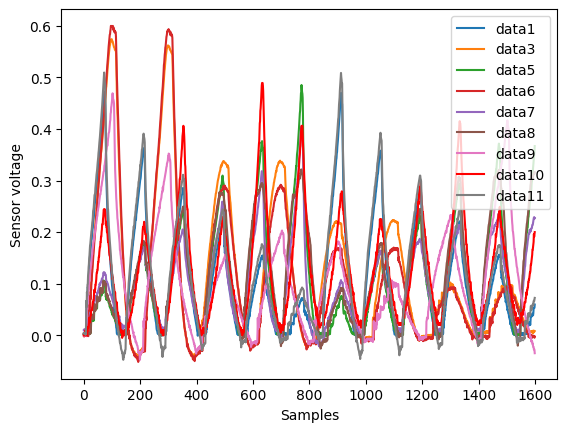

In [27]:

# plt.plot(sensor_voltage0, label="data0")
plt.plot(sensor_voltage1, label="data1")
# plt.plot(sensor_voltage2, label="data2")
plt.plot(sensor_voltage3, label="data3")
# plt.plot(sensor_voltage4, label="data4")
plt.plot(sensor_voltage5, label="data5")
plt.plot(sensor_voltage6, label="data6")
plt.plot(sensor_voltage7, label="data7")
plt.plot(sensor_voltage8, label="data8")
plt.plot(sensor_voltage9, label="data9")
plt.plot(sensor_voltage10, label="data10", color="red")
plt.plot(sensor_voltage11, label="data11")

plt.legend()
plt.xlabel("Samples")
plt.ylabel("Sensor voltage")
plt.show()

In [28]:
## Removing outliers from the sensor signal 6 and the corresponding bending angles
new_sensor_signal6 = sensor_voltage6[bending_angle6<=100]
new_bending_angle6 = bending_angle6[bending_angle6<=100]

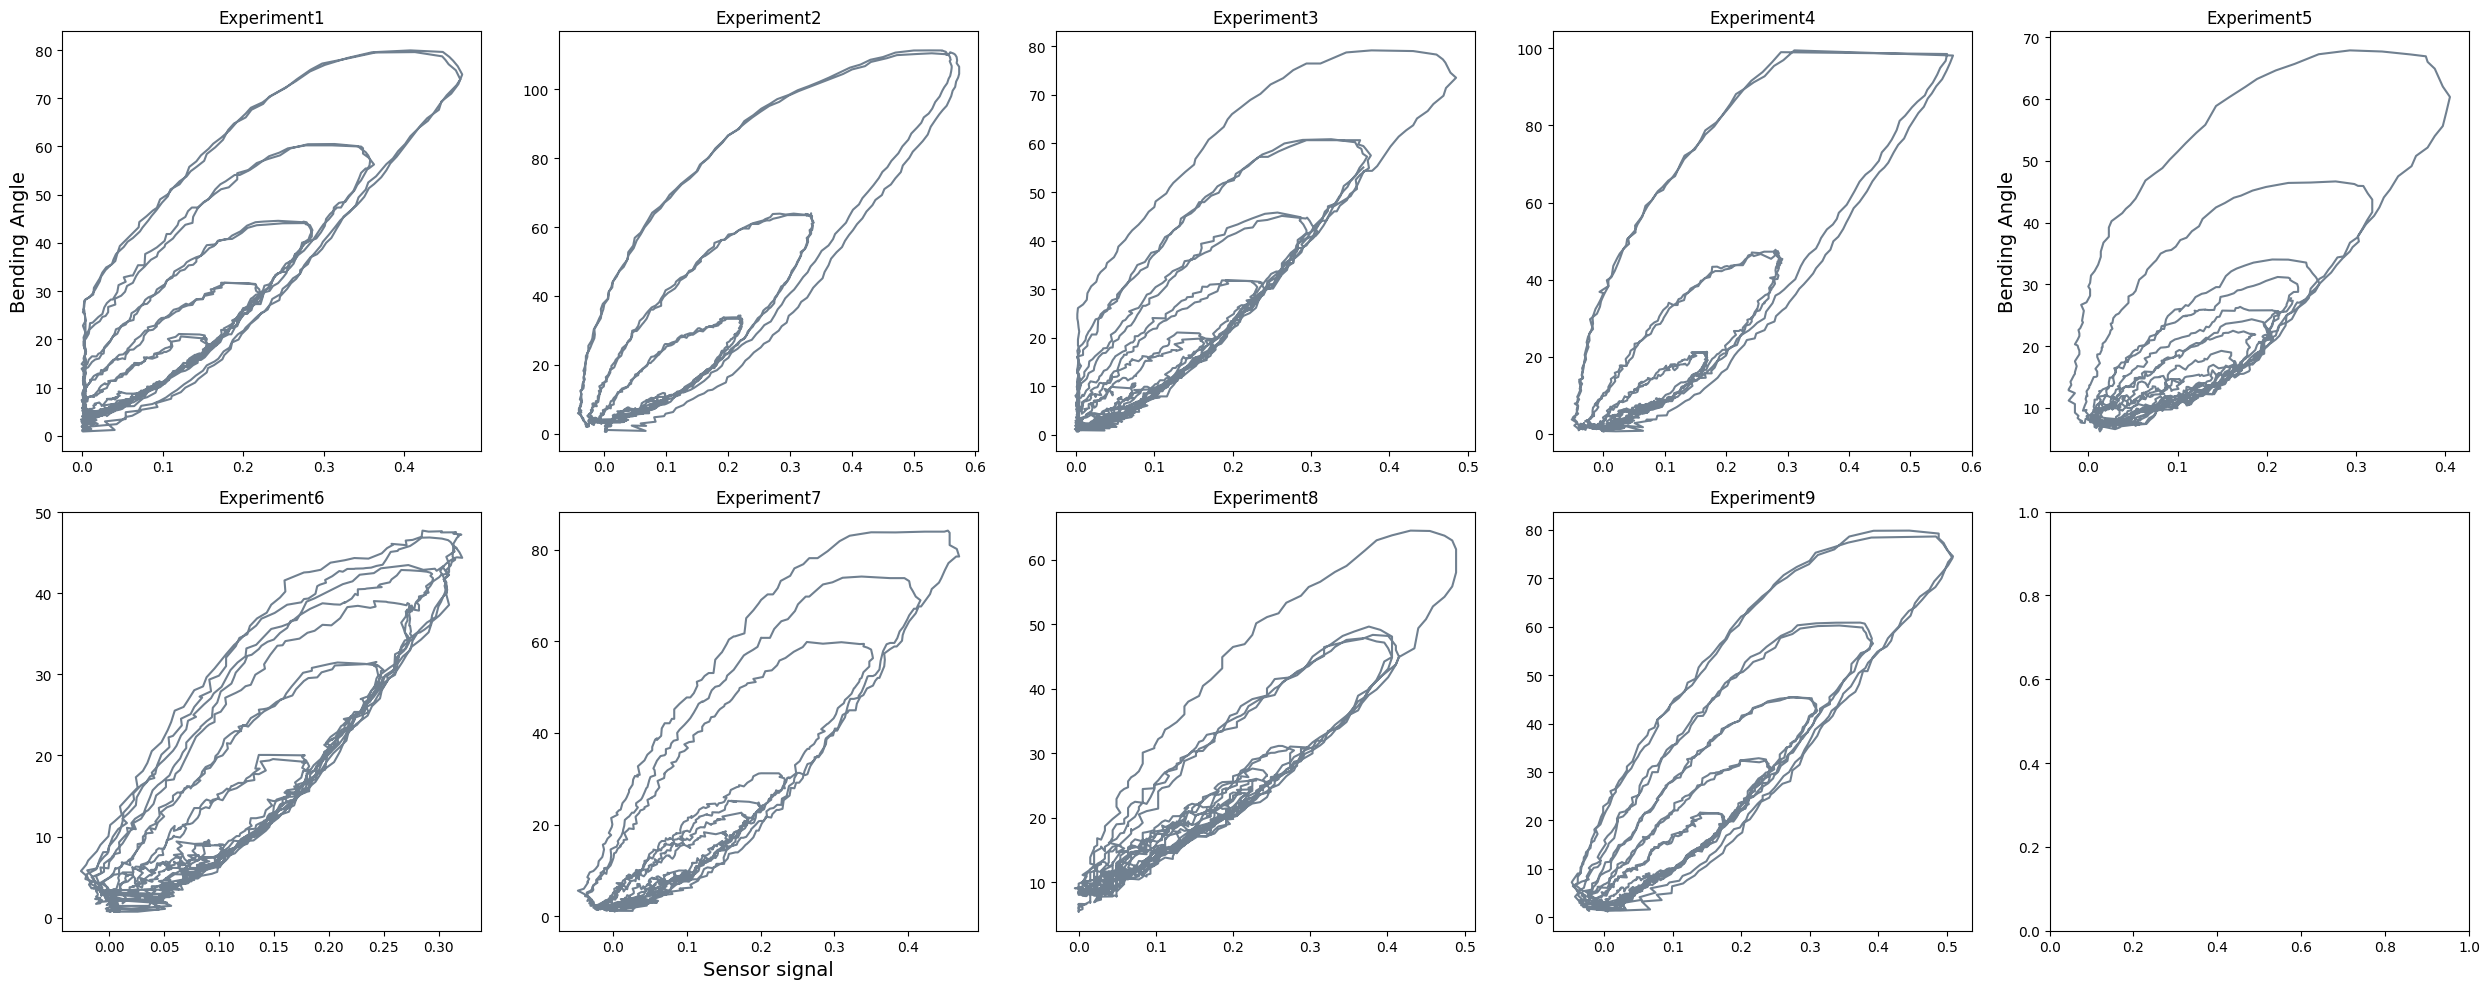

In [29]:
## error plot for cl model predictions and non cl model predictions wrt ground truth
### ALL IN A SINGLE CANVAS WITH SUBPLOT
fig, axs = plt.subplots(2, 5, figsize=(25, 10))
# axs[0,0].plot(sensor_voltage0, bending_angle0, label="data0", color="green")
# axs[0,0].set_title('Experiment0')

axs[0,0].plot(sensor_voltage1, bending_angle1, label="data1", color="slategray")
axs[0,0].set_title('Experiment1')
axs[0,0].set_ylabel("Bending Angle", fontsize=14)

axs[0,1].plot(sensor_voltage3, bending_angle3, label="data2", color="slategray")
axs[0,1].set_title('Experiment2')


axs[0,2].plot(sensor_voltage5, bending_angle5, label="data4", color="slategray")
axs[0,2].set_title('Experiment3')

axs[0,3].plot(new_sensor_signal6, new_bending_angle6, label="data5", color="slategray")
axs[0,3].set_title('Experiment4')

axs[0,4].plot(sensor_voltage7, bending_angle7, label="data6", color="slategray")
axs[0,4].set_title('Experiment5')
axs[0,4].set_ylabel("Bending Angle", fontsize=14)

axs[1,0].plot(sensor_voltage8, bending_angle8, label="data7", color="slategray")
axs[1,0].set_title('Experiment6')

axs[1,1].plot(sensor_voltage9, bending_angle9, label="data8", color="slategray")
axs[1,1].set_title('Experiment7')
axs[1,1].set_xlabel("Sensor signal", fontsize=14)

axs[1,2].plot(sensor_voltage10, bending_angle10, label="data9", color="slategray")
axs[1,2].set_title('Experiment8')

axs[1,3].plot(sensor_voltage11, bending_angle11, label="data10", color="slategray")
axs[1,3].set_title('Experiment9')
plt.tight_layout()
plt.show()


In [30]:
bending_angle11.max()

79.78519994628395

In [31]:
# # print(f"Area under the hysteresis curve for data 0: {np.trapz(sensor_voltage0, bending_angle0)}")
# print(f"Area under the hysteresis curve for data 1: {np.trapz(sensor_voltage1, bending_angle1)}")
# # print(f"Area under the hysteresis curve for data 2: {np.trapz(sensor_voltage2, bending_angle2)}")
# print(f"Area under the hysteresis curve for data 2: {np.trapz(sensor_voltage3, bending_angle3)}")
# # print(f"Area under the hysteresis curve for data 3: {np.trapz(sensor_voltage4, bending_angle4)}")
# print(f"Area under the hysteresis curve for data 4: {np.trapz(sensor_voltage5, bending_angle5)}")
# print(f"Area under the hysteresis curve for data 5: {np.trapz(sensor_voltage6, bending_angle6)}")
# print(f"Area under the hysteresis curve for data 6: {np.trapz(sensor_voltage7, bending_angle7)}")
# print(f"Area under the hysteresis curve for data 7: {np.trapz(sensor_voltage8, bending_angle8)}")
# print(f"Area under the hysteresis curve for data 8: {np.trapz(sensor_voltage9, bending_angle9)}")
# print(f"Area under the hysteresis curve for data 9: {np.trapz(sensor_voltage10, bending_angle10)}")
# print(f"Area under the hysteresis curve for data 10: {np.trapz(sensor_voltage11, bending_angle11)}")
# ## dataset/experiment 10 has the least hysteresis so we will use it as the base signal and then we
# ## noise to experiment

Updating "hysteresis_barh.svg" ... Done.
"Inkscape" (https://inkscape.org) is required to convert a SVG file to an EMF file; however, it is not found on this device.
Install it and then try again.


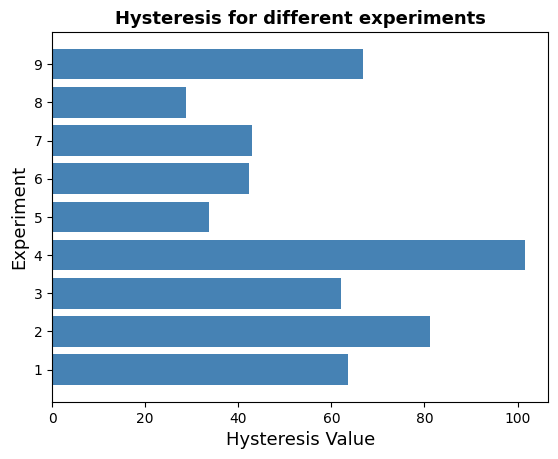

In [32]:
## Plot hysteresis curve for different experiments
exps = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]
h1 = np.trapz(sensor_voltage1, bending_angle1)
h2 = np.trapz(sensor_voltage3, bending_angle3)
# h3 = np.trapz(sensor_voltage4, bending_angle4)
h4 = np.trapz(sensor_voltage5, bending_angle5)
h5 = np.trapz(sensor_voltage6, bending_angle6)
h6 = np.trapz(sensor_voltage7, bending_angle7)
h7 = np.trapz(sensor_voltage8, bending_angle8)
h8 = np.trapz(sensor_voltage9, bending_angle9)
h9 = np.trapz(sensor_voltage10, bending_angle10)
h10 = np.trapz(sensor_voltage11, bending_angle11)
h_all = [h1, h2, h4, h5, h6, h7, h8, h9, h10]
plt.barh(exps, h_all, color="steelblue")
plt.xlabel("Hysteresis Value", fontdict={"fontsize":13})
plt.ylabel("Experiment", fontdict={"fontsize":13})
# plt.tick_params(axis="both", labelsize="12")
plt.title("Hysteresis for different experiments", fontdict={"fontsize":13, "weight":"bold"})
save_fig("hysteresis_barh.svg", dpi=300, conv_svg_to_emf=True, verbose=True)
plt.show()

/tmp/ipykernel_125438/10871837.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels(['1','2','3','4','5','6','7','8','9'])


Updating "sensorSig_dist.svg" ... Done.
"Inkscape" (https://inkscape.org) is required to convert a SVG file to an EMF file; however, it is not found on this device.
Install it and then try again.


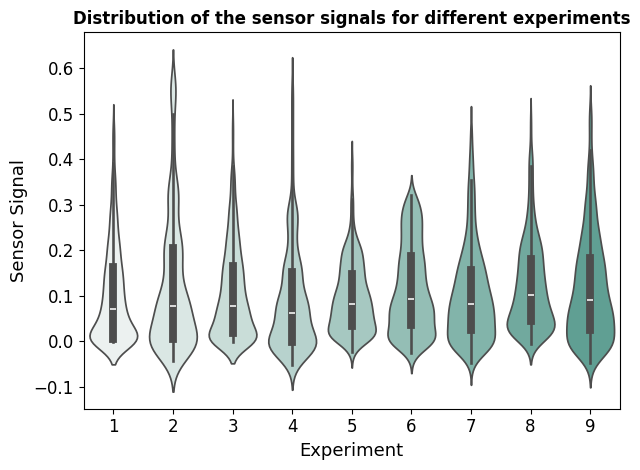

In [39]:
## Raw sensor value plot
sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
axs = sns.violinplot([sensor_voltage1, sensor_voltage3, sensor_voltage5, new_sensor_signal6, 
                sensor_voltage7, sensor_voltage8, sensor_voltage9, sensor_voltage10, sensor_voltage11], orient="v", palette="light:#5A9",
                ) 
axs.set_xticklabels(['1','2','3','4','5','6','7','8','9'])
plt.ylabel("Sensor Signal", fontdict={"fontsize":13})
plt.xlabel("Experiment", fontdict={"fontsize":13})
plt.tick_params(axis="both", labelsize="12")
plt.title("Distribution of the sensor signals for different experiments", fontdict={"fontsize":12,"weight":"bold"})
plt.tight_layout()
save_fig("sensorSig_dist.svg", dpi=300, conv_svg_to_emf=True, verbose=True)
plt.show()

In [34]:
# plt.plot(sensor_voltage1, bending_angle1, label="data1")
# plt.plot(sensor_voltage2, bending_angle2, label="data2")
# plt.plot(sensor_voltage3, bending_angle3, label="data3")
# plt.plot(sensor_voltage4, bending_angle4, label="data4")
# plt.plot(sensor_voltage5, bending_angle5, label="data5")
# plt.plot(sensor_voltage6, bending_angle6, label="data6")
# plt.plot(sensor_voltage7, bending_angle7, label="data7")
# plt.plot(sensor_voltage8, bending_angle8, label="data8")
# plt.plot(sensor_voltage9, bending_angle9, label="data9")
# plt.plot(sensor_voltage10, bending_angle10, label="data10")
# plt.plot(sensor_voltage11, bending_angle11, label="data11")
# plt.plot(sensor_voltage12, bending_angle12, label="data12")
## Calculate the area enclosed by the hysteresis loop using the trapezoidal rule
# area_hysteresis = np.trapz(sensor_voltage12, bending_angle12)

# print(f"Area under the hysteresis curve: {area_hysteresis}")
# plt.legend()
# plt.xlabel("Sensor Signal")
# plt.ylabel("Bending Angle")
# plt.show()

Check the similarity of the datasets

In [35]:
[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [36]:
a = 0.1
b = np.array([0.3, 0.5, 0.6, 0.8, 0.2])
(b <= a).sum()
a = {1:[[0,1,1],[3,4,5]], 2:[[6,7,4],[4,7,2]]}
for i in range(len(a.keys())):
    print(list(a.values())[i][0])

[0, 1, 1]
[6, 7, 4]


In [37]:
## check the similarity of the 2d distribution that contains the sensor values as well
## the bending angles of the finger, we use wasserstein distance here
def was_distance_test(sensorVoltage_base, sensorVoltage_new):
    distance = wasserstein_distance(sensorVoltage_base, sensorVoltage_new)
    return distance


In [38]:
## Plot the data
was_distance_array = np.zeros((10,10))
sensorVoltage_list = [sensor_voltage10, sensor_voltage1, 
             sensor_voltage3, sensor_voltage4, sensor_voltage5,
             sensor_voltage6, sensor_voltage7, sensor_voltage8, 
             sensor_voltage9, sensor_voltage11]
bendingAngle_list = [bending_angle10, bending_angle1, bending_angle3, bending_angle4, 
                     bending_angle5, bending_angle6, bending_angle7, bending_angle8,
                     bending_angle9, bending_angle11]
for i in range(0,10):
    for j in range(0,10):
        dist = was_distance_test(sensorVoltage_list[i], 
                                   sensorVoltage_list[j])
        was_distance_array[i][j] = dist
sns.heatmap(was_distance_array, annot=True)
plt.show()

NameError: name 'sensor_voltage4' is not defined

In [110]:
# ## Plot the data
# ks_pval_heatmap_array = np.zeros((5,5)) 
# ks_stat_heatmap_array = np.zeros((5,5)) 
# data_list = [sensor_voltage1, sensor_voltage2, sensor_voltage3, 
#              sensor_voltage4, sensor_voltage5]
# for i in range(0,5):
#     for j in range(0,5):
#         ks_temp, ks_stat = KS_test(data_list[i], data_list[j])
#         ks_pval_heatmap_array[i][j] = ks_temp
#         ks_stat_heatmap_array[i][j] = ks_stat
# print("KS stats")
# sns.heatmap(ks_stat_heatmap_array, annot=True)
# plt.show()
# print("Pval------")
# sns.heatmap(ks_pval_heatmap_array, annot=True)
# plt.show()

In [111]:
## Scaling with dummy data
## Create dummy pose values to fit the normalizer
# dummy_sensorVoltage = np.array([-0.1, 0.4]).reshape(-1,1)
# dummy_angle = np.array([0, 100]).reshape(-1,1)
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaler.fit(dummy_sensorVoltage)
# sensor_voltage1 = scaler.fit_transform(sensor_voltage1.reshape(-1,1))
# bending_angle1 = bending_angle1/100
# bending_angle2 = bending_angle2/100
# sensor_voltage2 = scaler.transform(sensor_voltage2.reshape(-1,1))



In [112]:
'''
Scaling using min max scalar doesn't help even when both the features and the targets are scaled 
Also scaling using dummy feature maps doesn't help
'''
## train test features creation
'''
-------------------->
Note: Scaling with this trick helps here but worsens the accuracy in CL scenario
'''
# train_features = sensor_voltage1/0.51
# train_targets = bending_angle1/100

# test_features = sensor_voltage1/0.51
# test_targets = bending_angle1/100

train_features = sensor_voltage10
train_targets = bending_angle10


In [113]:
'''
Using a bigger batch size (64) rather than using a smaller batch size helps to capture the data/signal
in a more structured manner.
'''    
class RegressionNN(nn.Module):
    def __init__(self):
        super(RegressionNN, self).__init__()
        self.lstm1 = nn.LSTM(1, 16, 1, batch_first=True, bidirectional=False)
        self.fc1 = nn.Linear(16, 64)
        self.fc2 = nn.Linear(64,256)
        self.fc3 = nn.Linear(256, 1)
        self.flatten = nn.Flatten()
        self.relu = nn.ReLU()

    def forward(self, x):
        x,_ = self.lstm1(x)
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
# Create a dataset and dataloader
features = torch.FloatTensor(train_features).unsqueeze(1)
targets = torch.FloatTensor(train_targets).unsqueeze(1)
dataset = TensorDataset(features, targets)
dataloader = DataLoader(dataset, batch_size=128, shuffle=False)

# Initialize the model
model = RegressionNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop
num_epochs = 450
loss_store = []
for epoch in range(num_epochs):
    for inputs, targets in dataloader:
        inputs = inputs
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    loss_store.append(loss.item())   
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

KeyboardInterrupt: 

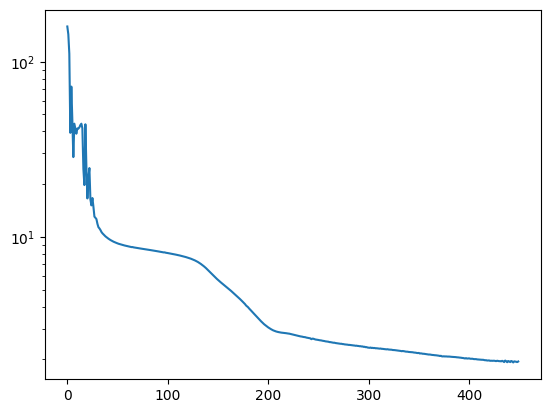

In [21]:
plt.plot(loss_store)
plt.yscale("log")

In [22]:
test_features = sensor_voltage5
test_targets = bending_angle5

The rmse error is 8.48485052983389 rad


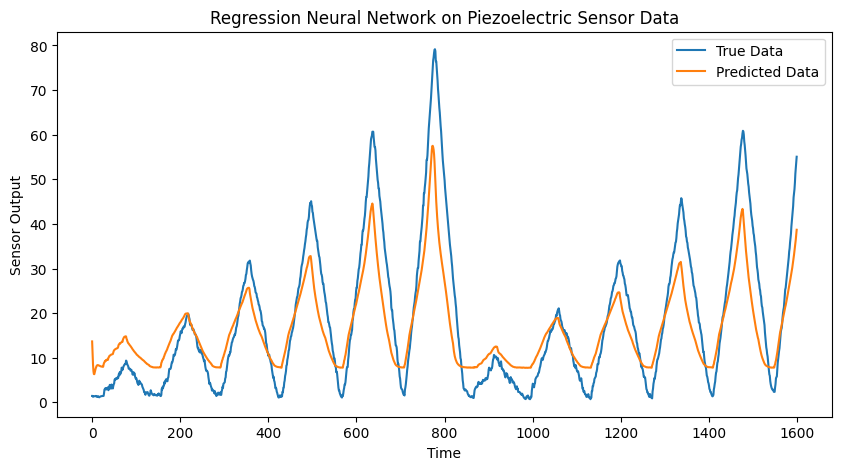

In [23]:
## Test phase
val_data = torch.FloatTensor(test_features).unsqueeze(1)
model.eval()
with torch.no_grad():
    predictions = model(val_data).squeeze().numpy()
print(f"The rmse error is {root_mean_squared_error(test_targets, predictions)} rad")
## save the predictions
# np.save("noCL_preds/predictions_signal4.npy", predictions)
## Plot the graph
plt.figure(figsize=(10, 5))
plt.plot(test_targets, label='True Data')
plt.plot(predictions, label='Predicted Data')
plt.title('Regression Neural Network on Piezoelectric Sensor Data')
plt.xlabel('Time')
plt.ylabel('Sensor Output')
plt.legend()
plt.show()